#                     # Assignment on preprocessing  - titanic dataset

In [1]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the dataset into python environment

In [2]:
# read my data 
df = pd.read_csv('/home/dell/Downloads/ASSIGN/titanic_dataset preproceesing.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Do all the necessary pre-processing steps

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# EDA .. cleaned data now available
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
missing_values=df.isnull().sum()                ##Percentage of missing values
missing_values[missing_values>0]/len(df)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  # encode variables into numeric labels
le

LabelEncoder()

In [10]:
columns = ['Sex', 'Embarked']

for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])


In [11]:
#drop un-insightful columns
train_df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_df  =df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [12]:
#Age: fill na with medium age
median_age = train_df['Age'].dropna().median()
train_df['Age'] = train_df['Age'].fillna(median_age)
test_df['Age'] = test_df['Age'].fillna(median_age)

In [13]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [14]:
test_df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [15]:
#Fare: fill na with medium fare
median_fare = train_df['Fare'].dropna().median()
test_df['Fare'] = test_df['Fare'].fillna(median_fare)

In [16]:
train_data = train_df.values
test_data = test_df.values
    
X_train = train_data[:,1:]
y_train = train_data[:,0]
    
X_test = test_data[:,1:]
idx = test_data[:,0].astype(np.int32)

# Create kNN and SVM models

In [17]:
#SVM
svc = SVC()

svc

SVC()

In [18]:
svc.fit(X_train, y_train)
score_svc = svc.score(X_train, y_train)

In [19]:
out_svc = svc.predict(X_test)    
print(f'SVM score: {score_svc}') 

SVM score: 0.6835016835016835


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
score_knn = knn.score(X_train, y_train)
out_knn = knn.predict(X_test)
print(f'knn score: {score_knn}')  

knn score: 0.8080808080808081


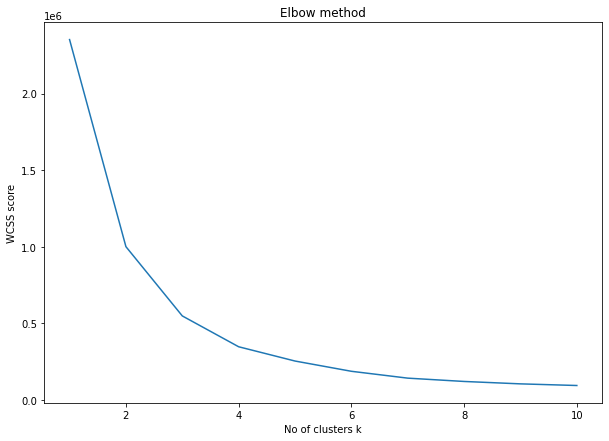

In [22]:
##finding number of clusters

wcss=[]
for i in range(1,11):
    
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
    km.fit(train_df)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters k")
plt.ylabel("WCSS score")
plt.show()

In [23]:
### from above graph clear that we have 4 clusters in the dataset.

# k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models 

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [25]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


In [27]:
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train2.shape)
print(X_val.shape)

(712, 7)
(179, 7)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=10,random_state=0,min_samples_split=2)

dt.fit(X_train2, y_train2)

y_pred_val = dt.predict(X_val)
print(accuracy_score(y_val,y_pred_val))

0.7877094972067039


In [29]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=0,shuffle=True)

for train_index, val_index in cv.split(X_train):
     print("TEST: ",val_index[:10],"TRAIN: ",train_index[:10])  
     Xtrain, Xval = X_train[train_index], X_train[val_index]
     ytrain, yval = y_train[train_index], y_train[val_index]
     print((ytrain==1).sum(),(ytrain==0).sum(),(yval==1).sum(),(yval==0).sum())   
 

TEST:  [ 1  5  8 14 27 30 31 34 37 40] TRAIN:  [ 0  2  3  4  6  7  9 10 11 12]
273 439 69 110
TEST:  [ 2 10 12 17 18 20 21 35 39 45] TRAIN:  [ 0  1  3  4  5  6  7  8  9 11]
275 438 67 111
TEST:  [ 0  3  6  7 15 22 26 38 46 51] TRAIN:  [ 1  2  4  5  8  9 10 11 12 13]
284 429 58 120
TEST:  [ 4 13 16 24 25 29 33 44 59 61] TRAIN:  [ 0  1  2  3  5  6  7  8  9 10]
275 438 67 111
TEST:  [ 9 11 19 23 28 32 36 41 42 43] TRAIN:  [ 0  1  2  3  4  5  6  7  8 10]
261 452 81 97


In [30]:
dt = DecisionTreeClassifier(max_depth=10,random_state=0,min_samples_split=2)

cv = KFold(n_splits=5, random_state=0,shuffle=True)

scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

#print(scores)
print(np.mean(scores))

0.8114368212918208


In [31]:
(y_train==1).sum(),(y_train==0).sum()

(342, 549)

In [32]:
from sklearn.model_selection import StratifiedKFold

scv = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)

for train_index, val_index in scv.split(X_train,y_train):
     print("\n TEST: ",val_index[:10],"\n\n TRAIN: ",train_index[:10])   
     Xtrain, Xval = X_train[train_index], X_train[val_index]
     ytrain, yval = y_train[train_index], y_train[val_index]
     print((ytrain==1).sum(),(ytrain==0).sum(),(yval==1).sum(),(yval==0).sum()) 


 TEST:  [ 0  5 12 14 15 23 26 32 55 56] 

 TRAIN:  [ 1  2  3  4  6  7  8  9 10 11]
273 439 69 110

 TEST:  [ 6  7  9 46 49 52 53 54 59 60] 

 TRAIN:  [ 0  1  2  3  4  5  8 10 11 12]
274 439 68 110

 TEST:  [ 3 10 20 25 28 34 37 38 42 43] 

 TRAIN:  [ 0  1  2  4  5  6  7  8  9 11]
274 439 68 110

 TEST:  [ 4 11 17 18 19 27 29 30 31 40] 

 TRAIN:  [ 0  1  2  3  5  6  7  8  9 10]
274 439 68 110

 TEST:  [ 1  2  8 13 16 21 22 24 33 35] 

 TRAIN:  [ 0  3  4  5  6  7  9 10 11 12]
273 440 69 109


In [33]:
dt = DecisionTreeClassifier(max_depth=10,random_state=0,min_samples_split=2)

scv = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)

scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=scv, n_jobs=-1)

#print(scores)
print(np.mean(scores))

0.8013056305316677


In [34]:
##k-fold average accuracy score of the model is 0.8114368212918208

In [35]:
## stratified k-fold cross validation accuracy score of the model is 0.8013056305316677
